![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [52]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [53]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [54]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [55]:
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000


A partir de las estadisticas descriptivas de las variables season y hour, y de la cantidad promedio de usuarios (registrados y no resgistrados) que utilizaron las bicicletas, se puede afirmar que:

- La estación durante la cual mas usuarios utilizan las bicicletas es el verano, seguido por la primavera, el otoño y por ultimo el invierno.
- El 25% de las observaciones corresponden a la primavera.
- El 50% de las observaciones corresponden al verano.
- El 75% de las observaciones corresponden al otoño.
- La mayoria de observaciones se encuentran en verano y otoño (estaciones intermedias).
- La mayor cantidad de observaciones se encuentra en el otoño, y la menor cantidad de observaciones se encuentra en invierno.
- La hora en la que mas se usan las biciletas es las 5 p.m.
- La hora en la que menos se usan las biciletas es las 4 a.m.
- El 25% de las observaciones se encuentran a las 6 a.m.
- El 50% de las observaciones se encuentran a las 12 m.
- El 75% de las observaciones se encuentran a las 6 p.m.
- Las observaciones tienden a aumentar a medida que avanza el día, desde la madrugada hasta la noche.
- La mayor cantidad de observaciones se encuentra despues dle mediodía.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

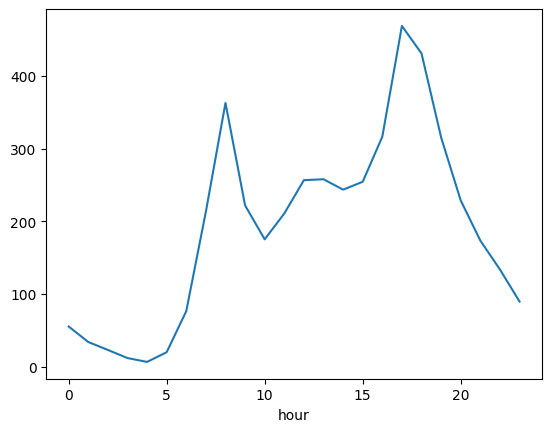

In [56]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<Axes: xlabel='hour'>

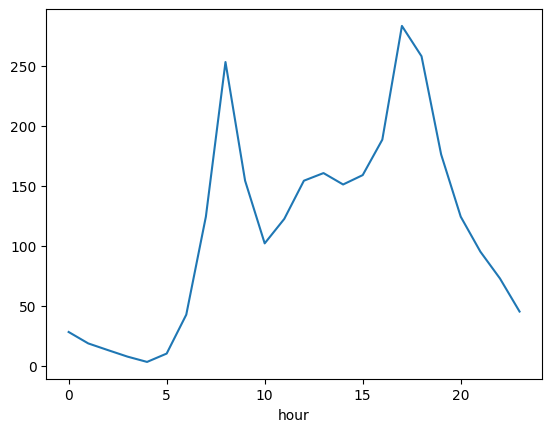

In [57]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes[bikes['season'] == 1].groupby('hour')['total'].mean().plot()

<Axes: xlabel='hour'>

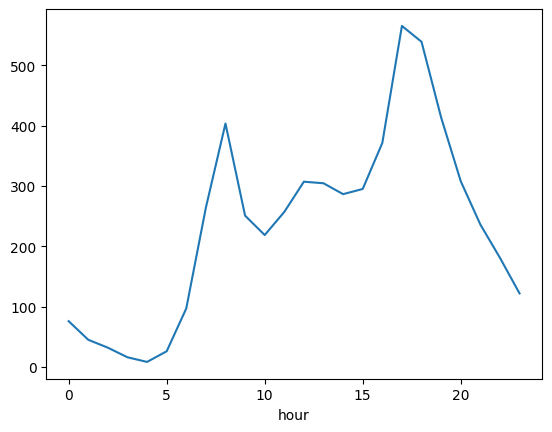

In [58]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes[bikes['season'] == 3].groupby('hour')['total'].mean().plot()

Los graficos indican que:
- Durante el invierno la hora con menos cantidad de usuarios es las 4 a.m. con aproximadamente 3.
- Durante el verano la hora con menos cantidad de usuarios es las 4 a.m. con aproximadamente 8.
- Durante el invierno la hora con mas cantidad de usuarios es las 6 p.m. con aproximadamente 300.
- Durante el verano la hora con mas cantidad de usuarios es las 6 p.m. con aproximadamente 600.

Con esta información se confirman las afirmaciones del punto 1.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [59]:
# Celda 3

# Codificación de Variable Categorica
bikes['season'] = pd.factorize(bikes.season)[0]

X = bikes[['hour', 'season']]
y = bikes['total']

model = LinearRegression()
model.fit(X, y)

print('Coeficientes:', model.coef_)

Coeficientes: [10.52129824 26.95130851]


- El coeficiente para la variable "hour" es aproximadamente 10.52, es decir que manteniendo constante la variable "season", por cada hora que se aumente, se incrementara en promedio 10.52 la cantidad de biciletas alquiladas.

- El coeficiente para la variable "season" es aproximadamente 26.95, es decir que manteniendo constante la variable "hour", cada vez que se cambie a una estación intermendia (primavera o verano) se incrementara en promedio 26.95 la cantidad de biciletas alquiladas.

- Las limitaciones del modelo de regresión lineal en este caso son: 
* La suposición de linealidad, cuando puede que la relación entre las variables predictoras y la variable de respuesta sea no lineal.
* La multicolinealidad, lo que puede afectar la precisión de los coeficientes estimados y hacer que la interpretación de los resultados sea más difícil.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [60]:
# Celda 4

import numpy as np
import pandas as pd

max_depth = 3  # Máxima profundidad
num_pct = 4  # Número de percentiles
max_features = None  # Máximo número de "features"
min_gain = 0.001  # Ganancia mínima

j = 0  # identificador de cuál es la variable que queremos analizar maxfea
print(X.columns[j])

hour


In [61]:
# División de la variable hour en num_ctp puntos (parámetro definido anteriormente) para obtener posibles puntos de corte
splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())
splits = np.unique(splits)
print(splits)

[ 0.  6. 12. 18.]


In [62]:
# División de las observaciones usando el punto de corte en la posición 1 de la lista de splits
k = 1
filter_l = X.iloc[:, j] < splits[k]

# División de la variable de respuesta de acuerdo a si la observación cumple o no con la regla binaria
y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

In [63]:
# Gini index de las observaciones que tienen un valor menor al punto de corte seleccionado
gini_l = gini(y_l)
print(gini_l)

-1217.4797111435876


In [64]:
# Gini index de las observaciones que tienen un valor menor al punto de corte seleccionado
gini_r = gini(y_r)
print(gini_r)

-120564.7847413347


In [65]:
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

In [66]:
# Ganancia de la variable 'hour' en el punto de corte selecionado
gini_impurity(X.iloc[:, j], y, splits[k])

18120.937290485905

In [67]:
# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=4):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [68]:
# Obtención de la variable 'j', su punto de corte 'split' y su ganancia 'gain'
j, split, gain = best_split(X, y, 4)
j, split, gain

(0, 9.0, 12226.562731141603)

In [69]:
# División de las observaciones usando la mejor variable 'j' y su punto de corte 'split'
filter_l = X.iloc[:, j] < split

y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

In [70]:
y.shape[0], y_l.shape[0], y_r.shape[0]

(10886, 4049, 6837)

In [71]:
y.mean(), y_l.mean(), y_r.mean()

(191.57413191254824, 89.97357372190665, 251.74389352054996)

In [72]:
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=3, num_pct=4):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [73]:
tree = tree_grow(X, y, level=0, min_gain=0.001, max_depth=3, num_pct=4)
tree

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [0, 9.0],
 'n_samples': 10886,
 'gain': 12226.562731141603,
 'sl': {'y_pred': 1,
  'y_prob': 89.92940014811158,
  'level': 1,
  'split': [0, 7.0],
  'n_samples': 4049,
  'gain': 22723.524582456965,
  'sl': {'y_pred': 1,
   'y_prob': 32.561604584527224,
   'level': 2,
   'split': [0, 5.0],
   'n_samples': 3139,
   'gain': 195.88513020826167,
   'sl': {'y_pred': 1,
    'y_prob': 26.250223813786928,
    'level': 3,
    'split': -1,
    'n_samples': 2232,
    'gain': 457.03361558108077},
   'sr': {'y_pred': 1,
    'y_prob': 48.002200220022004,
    'level': 3,
    'split': -1,
    'n_samples': 907,
    'gain': 1595.6353253165944}},
  'sr': {'y_pred': 1,
   'y_prob': 287.3125,
   'level': 2,
   'split': [0, 8.0],
   'n_samples': 910,
   'gain': 11197.972380147374,
   'sl': {'y_pred': 1,
    'y_prob': 212.18599562363238,
    'level': 3,
    'split': -1,
    'n_samples': 455,
    'gain': 5197.1071057533845},
   'sr': {'y_pred'

In [74]:
# Definición de la función tree_predict para hacer predicciones según las variables 'X' y el árbol 'tree'

def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted

In [75]:
# Ejecución de función tree_predict
tree_predict(X, tree)

array([1., 1., 1., ..., 1., 1., 1.])

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [76]:
# Celda 5
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 10)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=3, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

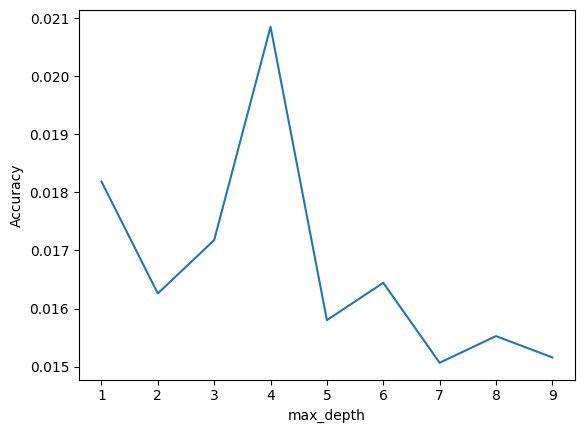

In [77]:
# Gráfica max_depth versus RMSE (error del modelo)
import matplotlib.pyplot as plt

plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [78]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.020852884938380226, 4)

In [79]:
# max_depth=4 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth=2, random_state=1)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [80]:
# Uso de la función .feature_importances_ para obtener la importancia de cada variable
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_}).sort_values('importance')

,feature,importance
1,season,0.048401
0,hour,0.951599


In [81]:
# Impresión de resultados de desemepeño del árbol de decisión
pd.Series(cross_val_score(clf, X, y, cv=3)).describe()

count    3.000000
mean     0.016260
std      0.003860
min      0.011849
25%      0.014880
50%      0.017911
75%      0.018465
max      0.019019
dtype: float64

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [82]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [83]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [84]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [85]:
# Celda 6
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, f1_score

tree_model = DecisionTreeClassifier(max_depth=3)  
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')

print("Desempeño del Árbol de Decisión:")
print(f'Accuracy: {accuracy_tree}')
print(f'F1-Score: {f1_tree}')

Desempeño del Árbol de Decisión:
Accuracy: 0.6413333333333333
F1-Score: 0.6383684026689356


In [86]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

y_pred_logreg = logreg_model.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')

print("\nDesempeño de la Regresión Logística:")
print(f'Accuracy: {accuracy_logreg}')
print(f'F1-Score: {f1_logreg}')


Desempeño de la Regresión Logística:
Accuracy: 0.6126666666666667
F1-Score: 0.6125969396939693


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [87]:
# Celda 7
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np

n_estimators = 100
n_estimators_leaf = 100
n_estimators_logistic = 100
np.random.seed(123)

n_samples = X_train.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]  # Generar 100 muestras para árboles de decisión con max_depth variable
samples_leaf = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators_leaf)]  # Generar 100 muestras para árboles de decisión con min_samples_leaf variable
samples_logistic = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators_logistic)]  # Generar 100 muestras para regresiones logísticas

seeds = np.random.randint(1, 10000, size=n_estimators)
seeds_leaf = np.random.randint(1, 10000, size=n_estimators_leaf)
seeds_logistic = np.random.randint(1, 10000, size=n_estimators_logistic)

trees = {}
for i in range(n_estimators):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=5, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

trees_leaf = {}
for i in range(n_estimators_leaf):
    trees_leaf[i] = DecisionTreeClassifier(max_features="sqrt", min_samples_leaf=5, random_state=seeds_leaf[i])
    trees_leaf[i].fit(X_train.iloc[samples_leaf[i]], y_train.iloc[samples_leaf[i]])

trees_logistic = {}
for i in range(n_estimators_logistic):
    trees_logistic[i] = LogisticRegression(random_state=seeds_logistic[i])
    trees_logistic[i].fit(X_train.iloc[samples_logistic[i]], y_train.iloc[samples_logistic[i]])

y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

y_pred_df_leaf = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators_leaf)))
for i in range(n_estimators_leaf):
    y_pred_df_leaf.iloc[:, i] = trees_leaf[i].predict(X_test)

y_pred_df_logistic = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators_logistic)))
for i in range(n_estimators_logistic):
    y_pred_df_logistic.iloc[:, i] = trees_logistic[i].predict(X_test)



In [88]:
# Impresión de la cantidad de modelos que predijeron 1 para 10 observaciones max deph
y_pred_df.sum(axis=1)[:10]

1483    92
2185    88
2520    82
3721    87
3727    20
4524    72
234      3
4735    19
5839    30
2939    67
dtype: object

In [89]:
# Impresión de la cantidad de modelos que predijeron 1 para 10 observaciones min samples
y_pred_df_leaf.sum(axis=1)[:10]

1483    67
2185    75
2520    58
3721    73
3727    26
4524    53
234     13
4735    36
5839    53
2939    62
dtype: object

In [90]:
# Impresión de la cantidad de modelos que predijeron 1 para 10 observaciones logistic regression
y_pred_df_logistic.sum(axis=1)[:10]

1483    100
2185     52
2520    100
3721    100
3727      1
4524    100
234       0
4735      0
5839     52
2939    100
dtype: object

In [91]:
# Votación mayoritaria max deph
y_pred = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(int)

# Desempeño al hacer votación mayoritaria
from sklearn import metrics
metrics.f1_score(y_pred, y_test)



0.6679973386560213

In [92]:
# Votación mayoritaria min samples
y_pred_df_leaf = (y_pred_df_leaf.sum(axis=1) >= (n_estimators_leaf / 2)).astype(int)

# Desempeño al hacer votación mayoritaria
from sklearn import metrics
metrics.f1_score(y_pred_df_leaf, y_test)

0.6737541528239203

In [93]:
# Votación mayoritaria logistic regression
y_pred_df_logistic = (y_pred_df_logistic.sum(axis=1) >= (n_estimators_logistic / 2)).astype(int)

# Desempeño al hacer votación mayoritaria
from sklearn import metrics
metrics.f1_score(y_pred_df_logistic, y_test)

0.6124661246612466

In [95]:
# Votación mayoritaria max deph
metrics.accuracy_score(y_pred, y_test)

0.6673333333333333

In [96]:
# Votación mayoritaria min samples
metrics.accuracy_score(y_pred_df_leaf, y_test)

0.6726666666666666

In [97]:
# Votación mayoritaria logistic regression
metrics.accuracy_score(y_pred_df_logistic, y_test)

0.6186666666666667

Los resultados de desempeño usando f1_score de los modelos obtenidos a traves de la votación mayoritaria son los siguientes:
- Los modelos de arboles de desición con max_deph = 5, tiene un valor de 0.6679973386560213
- Los modelos de arboles de min_samples_leaf = 5, tiene un valor de 0.6737541528239203
- Los modelos de regresiones logísticas, tiene un valor de 0.6124661246612466

Los resultados de desempeño usando accurancy_score de los modelos obtenidos a traves de la votación mayoritaria son los siguientes:
- Los modelos de arboles de desición con max_deph = 5, tiene un valor de 0.6673333333333333
- Los modelos de arboles de min_samples_leaf = 5, tiene un valor de 0.6726666666666666
- Los modelos de regresiones logísticas, tiene un valor de 0.6186666666666667

De acuerdo con la información anterior, ambos indicadores (F1-score y accuracy-score) muestran que el modelo de árboles de decisión con min_samples_leaf = 5 es el que tiene un mejor desempeño en este conjunto de datos. Este modelo podría ser considerado como el mejor candidato para utilizar en la predicción.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

In [99]:
# Celda 8

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np

n_estimators = 100
n_estimators_leaf = 100
n_estimators_logistic = 100
np.random.seed(123)

n_samples = X_train.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]  # Generar 100 muestras para árboles de decisión con max_depth variable
samples_leaf = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators_leaf)]  # Generar 100 muestras para árboles de decisión con min_samples_leaf variable
samples_logistic = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators_logistic)]  # Generar 100 muestras para regresiones logísticas

seeds = np.random.randint(1, 10000, size=n_estimators)
seeds_leaf = np.random.randint(1, 10000, size=n_estimators_leaf)
seeds_logistic = np.random.randint(1, 10000, size=n_estimators_logistic)

trees = {}
for i in range(n_estimators):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=5, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

trees_leaf = {}
for i in range(n_estimators_leaf):
    trees_leaf[i] = DecisionTreeClassifier(max_features="sqrt", min_samples_leaf=5, random_state=seeds_leaf[i])
    trees_leaf[i].fit(X_train.iloc[samples_leaf[i]], y_train.iloc[samples_leaf[i]])

trees_logistic = {}
for i in range(n_estimators_logistic):
    trees_logistic[i] = LogisticRegression(random_state=seeds_logistic[i])
    trees_logistic[i].fit(X_train.iloc[samples_logistic[i]], y_train.iloc[samples_logistic[i]])

y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

y_pred_df_leaf = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators_leaf)))
for i in range(n_estimators_leaf):
    y_pred_df_leaf.iloc[:, i] = trees_leaf[i].predict(X_test)

y_pred_df_logistic = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators_logistic)))
for i in range(n_estimators_logistic):
    y_pred_df_logistic.iloc[:, i] = trees_logistic[i].predict(X_test)

samples_oob = []
samples_oob_leaf = []
samples_oob_logistic = []

# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

for sample in samples_leaf:
    samples_oob_leaf.append(sorted(set(range(n_samples)) - set(sample)))

for sample in samples_logistic:
    samples_oob_logistic.append(sorted(set(range(n_samples)) - set(sample)))

# Estimación de los errores OOB para cada clasificador
errors = np.zeros(n_estimators)
errors_leaf = np.zeros(n_estimators_leaf)
errors_logistic = np.zeros(n_estimators_logistic)

for i in range(n_estimators):
    y_pred_ = trees[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

for i in range(n_estimators_leaf):
    y_pred_leaf_ = trees_leaf[i].predict(X_train.iloc[samples_oob_leaf[i]])
    errors_leaf[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob_leaf[i]], y_pred_leaf_)

for i in range(n_estimators_logistic):
    y_pred_logistic_ = trees_logistic[i].predict(X_train.iloc[samples_oob_logistic[i]])
    errors_logistic[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob_logistic[i]], y_pred_logistic_)


In [100]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
alpha = (1 - errors) / (1 - errors).sum()

alpha_leaf = (1 - errors_leaf) / (1 - errors_leaf).sum()

alpha_logistic = (1 - errors_logistic) / (1 - errors_logistic).sum()

In [101]:
# Ponderación de las predicciones con los pesos alpha max deph
weighted_sum_1 = ((y_pred_df) * alpha).sum(axis=1)
weighted_sum_1.head(20)


1483    0.920558
2185    0.880788
2520    0.820446
3721    0.870603
3727    0.198786
4524    0.722732
234     0.030422
4735    0.189145
5839    0.300414
2939    0.671798
3053     0.90149
867     0.880992
276     0.900649
5798    0.050024
3512    0.911355
5789    0.058705
3198    0.783304
5908    0.960207
5718    0.138764
2687    0.141017
dtype: object

In [102]:
# Ponderación de las predicciones con los pesos alpha min samples
weighted_sum_2 = ((y_pred_df_leaf) * alpha_leaf).sum(axis=1)
weighted_sum_2.head(20)

1483    0.671353
2185    0.750717
2520    0.581586
3721    0.729716
3727    0.260936
4524    0.530283
234     0.129182
4735     0.36072
5839    0.528985
2939    0.619643
3053    0.730633
867     0.739109
276     0.649399
5798    0.330431
3512    0.771799
5789    0.231224
3198    0.659713
5908    0.770041
5718    0.470849
2687     0.26981
dtype: object

In [103]:
# Ponderación de las predicciones con los pesos alpha logistic regression
weighted_sum_3 = ((y_pred_df_logistic) * alpha_logistic).sum(axis=1)
weighted_sum_3.head(20)

1483         1.0
2185    0.523674
2520         1.0
3721         1.0
3727    0.009699
4524         1.0
234          0.0
4735         0.0
5839    0.519482
2939         1.0
3053         1.0
867          1.0
276          1.0
5798         0.0
3512         1.0
5789         0.0
3198         1.0
5908         1.0
5718         0.0
2687         0.0
dtype: object

In [104]:
# Desempeño al hacer votación ponderada max deph
y_pred = (weighted_sum_1 >= 0.5).astype(int)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6644429619746498, 0.6646666666666666)

In [105]:
# Desempeño al hacer votación ponderada min samples
y_pred_leaf = (weighted_sum_2 >= 0.5).astype(int)
metrics.f1_score(y_pred_leaf, y_test), metrics.accuracy_score(y_pred_leaf, y_test)

(0.6671122994652406, 0.668)

In [106]:
# Desempeño al hacer votación ponderada logistic regression
y_pred_logistic = (weighted_sum_3 >= 0.5).astype(int)
metrics.f1_score(y_pred_logistic, y_test), metrics.accuracy_score(y_pred_logistic, y_test)

(0.6119402985074627, 0.6186666666666667)

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

# Celda 9

Los resultados de desempeño usando f1_score de los modelos obtenidos a traves de la votación ponderada son los siguientes:
- Los modelos de arboles de desición con max_deph = 5, tiene un valor de 0.6644429619746498
- Los modelos de arboles de min_samples_leaf = 5, tiene un valor de 0.6671122994652406
- Los modelos de regresiones logísticas, tiene un valor de 0.6119402985074627

Los resultados de desempeño usando accurancy_score de los modelos obtenidos a traves de la votación ponderada son los siguientes:
- Los modelos de arboles de desición con max_deph = 5, tiene un valor de 0.6646666666666666
- Los modelos de arboles de min_samples_leaf = 5, tiene un valor de 0.668
- Los modelos de regresiones logísticas, tiene un valor de 0.6186666666666667

De acuerdo con ambos indicadores de desempeño (F1-score y accuracy-score), el modelo de árboles de decisión con min_samples_leaf = 5 parece ser el mejor candidato entre los modelos considerados en la votación ponderada. Este modelo muestra un buen equilibrio entre precisión y exhaustividad (F1-score) y una alta precisión en la clasificación general (accuracy-score).

Dado que el modelo realizado a partir de la votación mayoritaria, arrojó el mismo resultado, se puede afirmar que el parametro min_samples_leaf, tiene mayor influencia en la precisión de los árboles de decisión que el parametro max_deph, para este conjunto de datos.

Asi mismo, se encontró que los modelos de arboles de dicisión se ajustan mejor a este conjunto de datos, y que la votación ponderada arroja resultados mas precisos.